In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import shape
import shapefile
import requests
from urllib import request
from zipfile import ZipFile
from io import BytesIO
from datetime import date
import osr

In [4]:
year_list = pd.date_range('2002-01-01',date.today(), 
              freq='YS').strftime("%Y").tolist()
site_url = 'https://rmgsc.cr.usgs.gov/outgoing/GeoMAC/historic_fire_data/'
perimeter_url = 'https://rmgsc.cr.usgs.gov/outgoing/GeoMAC/historic_fire_data/US_HIST_FIRE_PERIMTRS_DD83.zip'

In [123]:
%%time
geo_list = list()
for year in year_list[:-1]:
    zip_file_url = site_url+year+"_sit_rep_pts_dd83.zip"
    zipfile = ZipFile(BytesIO(request.urlopen(zip_file_url).read()))
    filenames = [y for y in sorted(zipfile.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
    dbf, prj, shp, shx = [BytesIO(zipfile.read(filename)) for filename in filenames]
    r = shapefile.Reader(shp=shp, shx=shx, dbf=dbf)
    attributes, geometry = [], []
    field_names = [field[0] for field in r.fields[1:]]  
    for row in r.shapeRecords():  
        geometry.append(shape(row.shape.__geo_interface__))  
        record = [r.decode('utf-8') if type(r) == bytes else r for r in row.record]
        attributes.append(dict(zip(field_names, record)))
        
    try:
        proj4_string = osr.SpatialReference(str(prj.read())).ExportToProj4()
        year_data = gpd.GeoDataFrame(data = attributes, geometry = geometry, crs = proj4_string)
    except:
        year_data = gpd.GeoDataFrame(data = attributes, geometry = geometry)
    
    geo_list.append(year_data)

Wall time: 10.2 s


In [124]:
print(len(geo_list))
print([col for col in geo_list[0]])
geo_list[0]

18
['OBJECTID_1', 'REPDATE', 'REPDATE_FM', 'EVENT_ID', 'ENAME', 'ITYPE', 'DPRIORITY', 'ACTIVE', 'ACRES', 'PERSONNEL', 'LOCATE', 'EDAMAGE', 'ECOSTS', 'F_CONTAIN', 'LATDD', 'LONGDD', 'TEAMTYPE', 'TEAMNAME', 'GPRIORITY', 'CAUSE', 'STARTDATE', 'NEWACRES', 'UN_UNITID', 'UN_USTATE', 'HOTLINK', 'INTERNAL_I', 'OBJECTID', 'geometry']


,OBJECTID_1,REPDATE,REPDATE_FM,EVENT_ID,ENAME,ITYPE,DPRIORITY,ACTIVE,ACRES,PERSONNEL,...,GPRIORITY,CAUSE,STARTDATE,NEWACRES,UN_UNITID,UN_USTATE,HOTLINK,INTERNAL_I,OBJECTID,geometry
0,1,07/27/2002,2002-07-27 00:00:00,CA-SHF-6350,'Jim''S Creek',WF,,N,45.0,45.0,...,,L,07/22/2002,45.0,SHF,CA,http://www.nifc.gov/fireinfo/nfn.html,'07/27/2002:0800CA-SHF-6350JIM''S CREEKN',8575,POINT (-123.39142 40.48042)
1,2,07/27/2002,2002-07-27 00:00:00,CA-SHF-6350,'Jim''S Creek',WF,,N,45.0,45.0,...,,L,07/22/2002,45.0,SHF,CA,http://www.nifc.gov/fireinfo/nfn.html,'07/27/2002:0800CA-SHF-6350JIM''S CREEKN',8611,POINT (-123.39142 40.48042)
2,3,07/27/2002,2002-07-27 00:00:00,CA-SHF-6350,'Jim''S Creek',WF,,N,45.0,45.0,...,,L,07/22/2002,45.0,SHF,CA,http://www.nifc.gov/fireinfo/nfn.html,'07/27/2002:0800CA-SHF-6350JIM''S CREEKN',8612,POINT (-123.39142 40.48042)
3,4,08/29/2002,2002-08-29 00:00:00,CA-MVU-006542,Woodland,WF,,N,275.0,275.0,...,,U,08/27/2002,275.0,MVU,CA,http://www.nifc.gov/fireinfo/nfn.html,08/29/2002:1800CA-MVU-006542WOODLANDN,8246,POINT (-116.59807 33.07504)
4,5,07/27/2002,2002-07-27 00:00:00,CA-SHF-6350,'Jim''S Creek',WF,,N,45.0,45.0,...,,L,07/22/2002,45.0,SHF,CA,http://www.nifc.gov/fireinfo/nfn.html,'07/27/2002:0800CA-SHF-6350JIM''S CREEKN',7916,POINT (-123.39142 40.48042)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5674,5675,03/25/2002,2002-03-25 00:00:00,CO-BFP-0054,'Bent''S Old Fort/Old Trail',WF,,N,500.0,500.0,...,,H,03/23/2002,500.0,BFP,CO,http://www.nifc.gov/fireinfo/nfn.html,'03/25/2002:0000CO-BFP-0054Bent''s Old Fort/Ol...,17532,POINT (-103.41716 38.03334)
5675,5676,08/08/2002,2002-08-08 00:00:00,DC-NCP-0205,'Freedom''S Birth',LE,,N,0.0,0.0,...,,N,06/29/2002,0.0,HFP,WV,http://www.nifc.gov/fireinfo/nfn.html,'08/08/2002:0000DC-NCP-0205Freedom''s BirthN',17533,POINT (-77.14970 39.23511)
5676,5677,07/27/2002,2002-07-27 00:00:00,CA-SHF-6350,'Jim''S Creek',WF,,N,45.0,45.0,...,,L,07/22/2002,45.0,SHF,CA,http://www.nifc.gov/fireinfo/nfn.html,'07/27/2002:0800CA-SHF-6350JIM''S CREEKN',17534,POINT (-123.39142 40.48042)
5677,5678,03/25/2002,2002-03-25 00:00:00,CO-BFP-0054,'Bent''S Old Fort/Old Trail',WF,,N,500.0,500.0,...,,H,03/23/2002,500.0,BFP,CO,http://www.nifc.gov/fireinfo/nfn.html,'03/25/2002:0000CO-BFP-0054Bent''s Old Fort/Ol...,17535,POINT (-103.41716 38.03334)


In [125]:
pd.to_datetime(geo_list[0].REPDATE).describe()

count                    5665
unique                    267
top       2002-07-27 00:00:00
freq                     2932
first     2002-01-17 00:00:00
last      2002-12-20 00:00:00
Name: REPDATE, dtype: object

In [126]:
# Perimeters
zipfile = ZipFile(BytesIO(request.urlopen(perimeter_url).read()))
filenames = [y for y in sorted(zipfile.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
dbf, prj, shp, shx = [BytesIO(zipfile.read(filename)) for filename in filenames]
r = shapefile.Reader(shp=shp, shx=shx, dbf=dbf)
attributes, geometry = [], []
field_names = [field[0] for field in r.fields[1:]]  
for row in r.shapeRecords():  
    geometry.append(shape(row.shape.__geo_interface__))  
    attributes.append(dict(zip(field_names, row.record)))
        
try:
    proj4_string = osr.SpatialReference(str(prj.read())).ExportToProj4()
    perimeters = gpd.GeoDataFrame(data = attributes, geometry = geometry, crs = proj4_string)
except:
    perimeters = gpd.GeoDataFrame(data = attributes, geometry = geometry)

In [127]:
print(perimeters.shape)
print(perimeters.columns)
perimeters.tail()

(23473, 10)
Index(['objectid', 'year_', 'acres', 'fire_name', 'unit_id', 'irwinid',
       'fire_num', 'st_area_sh', 'st_length_', 'geometry'],
      dtype='object')


,objectid,year_,acres,fire_name,unit_id,irwinid,fire_num,st_area_sh,st_length_,geometry
23468,31039,2015,970.71,231,WA-NES,{00000000-0000-0000-0000-000000000000},2015-WA-NES-JV5T,0.000473,0.127232,"POLYGON ((-117.73109 47.97639, -117.73067 47.9..."
23469,31345,2015,465.67,Crater,ID-IPF,{00000000-0000-0000-0000-000000000000},2015-ID-IPF-J2SB,0.000223,0.086183,"MULTIPOLYGON (((-115.98788 47.04700, -115.9872..."
23470,31570,2015,3273.87,Barker,CA-SHF,{00000000-0000-0000-0000-000000000000},2015-CA-SHF-J0HS,0.001411,0.259386,"MULTIPOLYGON (((-123.10741 40.64041, -123.1081..."
23471,31363,2015,56.16,Barnaby,MT-KNF,{00000000-0000-0000-0000-000000000000},2015-MT-KNF-J1YR,0.000028,0.022840,"POLYGON ((-114.91645 48.92112, -114.91535 48.9..."
23472,31543,2015,1853.15,Bear Ridge,OR-UMF,{00000000-0000-0000-0000-000000000000},2015-OR-UMF-J1SY,0.000873,0.168638,"MULTIPOLYGON (((-117.67884 46.11399, -117.6793..."


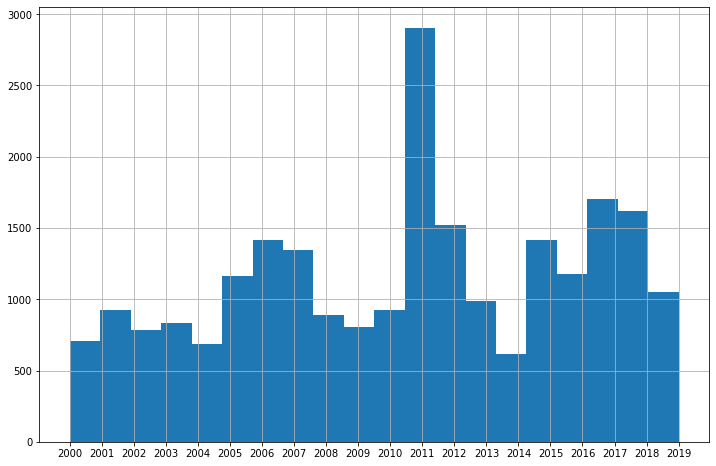

In [128]:
# Do we have fires for every year?
n_bins = len(perimeters.year_.astype(int).value_counts())
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = perimeters.year_.astype(int).hist(ax=ax, bins=n_bins)
low, hi  = perimeters.year_.astype(int).min(), perimeters.year_.astype(int).max()
ax.set_xticks(range(low, hi + 1));

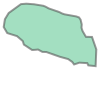

In [129]:
# Looks like a fire perimeter plot in the Geometry column:
perimeters.iloc[23471,9]

In [130]:
perimeters.geometry.head().centroid.x

0   -114.333232
1   -113.426231
2   -114.307999
3   -113.181045
4   -113.472163
dtype: float64

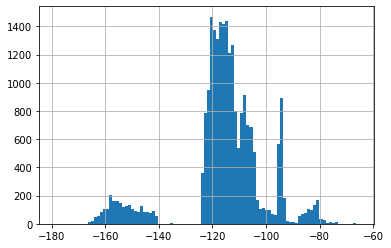

In [131]:
perimeters.geometry.centroid.x.hist(bins=100)

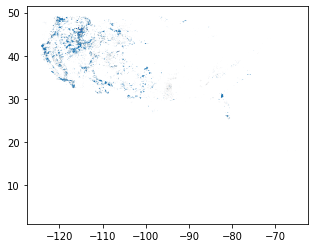

In [132]:
mask = perimeters.geometry.centroid.x > -130
perimeters[mask].geometry.plot()

In [133]:
perimeters.irwinid.value_counts()

{00000000-0000-0000-0000-000000000000}    19108
{AF112640-E29E-4896-8CA5-51BF614DA317}        2
{943D8086-7DF4-47C7-BB98-A358E962667E}        2
{1C7742BC-8C2E-48E4-9B96-57E66C9EB16E}        2
{D037CD04-1C32-4444-AAA6-D6F8290CA53E}        2
                                          ...  
{A70C008B-3EE3-4B90-9D1E-EE4364DB1DD0}        1
{56FEAFF6-A992-426F-B0B7-E100E7C288EC}        1
{A8938594-8221-4B6C-9C41-3BA11C04AEE5}        1
{486904BC-F91C-43F2-93DC-24292B748702}        1
{15763091-AB7D-4393-9111-7F72A3148A6A}        1
Name: irwinid, Length: 4362, dtype: int64

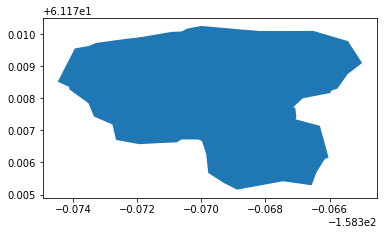

In [134]:
mask = perimeters.irwinid == '{AF112640-E29E-4896-8CA5-51BF614DA317}'
perimeters[mask].plot();

In [135]:
perimeters[mask]

,objectid,year_,acres,fire_name,unit_id,irwinid,fire_num,st_area_sh,st_length_,geometry
10650,48892,2019,43.502082,Boss Creek,AKSWS,{AF112640-E29E-4896-8CA5-51BF614DA317},2019-AKSWS-904667,0.000029,0.030880,"POLYGON ((-158.37044 61.18017, -158.37000 61.1..."
11932,49663,2019,572.263811,Boss Creek,AKSWS,{AF112640-E29E-4896-8CA5-51BF614DA317},2019-AKSWS-904667,0.000025,0.024312,"POLYGON ((-158.36603 61.17616, -158.36699 61.1..."


In [136]:
perimeters.to_file("perimeters.shp")